In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 경고 메세지 없애기
import warnings 

warnings.filterwarnings(action='ignore')

#🎈 변수명과 의미

- Name : 게임의 이름입니다.

- Platform : 게임이 지원되는 플랫폼의 이름입니다.

- Year : 게임이 출시된 연도입니다.

- Genre : 게임의 장르입니다.

- Publisher : 게임을 제작한 회사입니다.

- NA_Sales : 북미지역에서의 출고량입니다.

- EU_Sales : 유럽지역에서의 출고량입니다.

- JP_Sales : 일본지역에서의 출고량입니다.

- Other_Sales : 기타지역에서의 출고량입니다.

# 🎈 데이터의 기초적인 정보 확인

In [3]:
import pandas as pd
import numpy as np

raw = pd.read_csv('/content/drive/MyDrive/Colab/vgames2.csv')

print(raw.info(),'\n')
print('Shape:\n',raw.shape,'\n')
raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None 

Shape:
 (16598, 10) 



Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher NA_Sales EU_Sales JP_Sales  \
0  2008.0     Action           Destineer     0.04        0        0   
1  2009.0     Action  Namco Bandai Games     0.17        0        0   
2  2010.0  Adventure           Alchemist        0        0     0.02   
3  2010.0       Misc           Zoo Games     0.04        0        0   
4  2010.0   Platform         D3Publisher     0.12     0.09        0   

  Other_Sales  
0           0  
1        0.01  
2           0  
3           0  
4        0.04

# 🎈 결측치 확인 및 제거

In [4]:
# 결측치 확인
print(raw.isnull().sum())

print('\n\n결측치의 비율(%):\n',(271+50+58) * 100 /16598)

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64


결측치의 비율(%):
 2.2834076394746354


In [5]:
# 각 연도, 장르, 퍼블리셔 별 결측치 비율
is_null = raw.loc[(raw['Year'].isnull()) | (raw['Genre'].isnull()) | (raw['Publisher'].isnull())]
year_null = pd.DataFrame(is_null.groupby('Year').size() * 100 / raw.groupby('Year').size())
year_null[year_null[0].notnull()]


0
Year             
1980.0  11.111111
1996.0   0.384615
1998.0   0.531915
1999.0   0.591716
2000.0   0.289017
2001.0   0.416667
2002.0   0.363196
2003.0   0.130208
2004.0   3.030303
2005.0   0.747065
2006.0   0.299700
2007.0   0.583820
2008.0   0.352609
2009.0   0.211119
2010.0   0.479233
2011.0   0.531444
2012.0   0.763359
2013.0   0.183824
2014.0   0.344828
2015.0   0.492611
2016.0   0.589971

In [6]:
genre_null = pd.DataFrame(is_null.groupby('Genre').size() * 100 / raw.groupby('Genre').size())
genre_null[genre_null[0].notnull()]

0
Genre                 
Action        1.966717
Adventure     0.937500
Fighting      1.416765
Misc          3.056517
Platform      1.244344
Puzzle        2.076125
Racing        1.930813
Role-Playing  1.213756
Shooter       2.140673
Simulation    2.196532
Sports        1.794105
Strategy      1.617647

In [7]:
pd.set_option('display.max_rows', None)
pub_null = pd.DataFrame(is_null.groupby('Publisher').size() * 100 / raw.groupby('Publisher').size())
pub_null[pub_null[0].notnull()]

0
Publisher                                         
505 Games                                 0.520833
Activision                                1.230769
Atari                                     4.407713
Avanquest                                 3.846154
Bethesda Softworks                        2.816901
Black Bean Games                         11.764706
Capcom                                    1.312336
City Interactive                          5.263158
Codemasters                               1.315789
Comfort                                  16.666667
D3Publisher                               1.086957
DTP Entertainment                         2.222222
Deep Silver                               0.819672
Disney Interactive Studios                1.834862
Eidos Interactive                         1.515152
Electronic Arts                           1.406366
Empire Interactive                        1.923077
Focus Home Interactive                    3.448276
Funsta                                   25.000000
Ghostlight                                6.666667
Home Entertainment Suppliers             20.000000
Idea Factory                              0.775194
Ignition Entertainment                    3.278689
Infogrames                                1.612903
Just Flight                             100.000000
Kalypso Media                            10.344828
Konami Digital Entertainment              1.322115
Level 5                                   3.703704
LucasArts                                 1.111111
MTV Games                                 2.439024
Majesco Entertainment                     2.173913
Microprose                               16.666667
Midway Games                              1.515152
Namco Bandai Games                        0.858369
Natsume                                   5.882353
Nintendo                                  1.564723
Nippon Ichi Software                      0.952381
Oxygen Interactive                        4.545455
Pioneer LDC                              25.000000
Popcorn Arcade                           20.000000
Rising Star Games                         1.162791
Sears                                   100.000000
Sega                                      1.251956
Slitherine Software                      25.000000
Sony Computer Entertainment               0.585652
Square Enix                               1.287554
SquareSoft                                1.923077
System 3 Arcade Software                  7.142857
THQ                                       0.559441
Take-Two Interactive                      0.484262
Telltale Games                            4.000000
Titus                                     5.263158
TopWare Interactive                      50.000000
Ubisoft                                   0.868621
Ultravision                             100.000000
Universal Interactive                     4.347826
Unknown                                  51.231527
Valcon Games                             12.500000
Virgin Interactive                        1.612903
Vivendi Games                             2.439024
Warner Bros. Interactive Entertainment    6.465517

### ♦ 결측치의 비율은 2% 정도이고 연도, 장르별로는 결측치의 비율이 크게 다르지 않으므로 삭제한다.

### ♦ 다만, 퍼블리셔 별로 보았을 때 완전히 삭제되는 것들이 있지만 전체 데이터(16598개) 중 퍼블리셔 전제 결측치(58개) 미만인 작은 값이므로 삭제한다.


In [8]:
# 결측치 삭제
raw = raw.dropna(axis=0, how='any')

raw.isnull().sum()

Unnamed: 0     0
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

# 🎈 EDA (Data Prerprocessing)

### ♦ 출고량부분 단위 통일

- 천 단위, 백만 단위를 K와 M으로 표기해놓았기 때문에 실수로 바꾸어준다.
- 데이터의 범위를 보면, 'M'단위와 실수 단위가 소수점 두자리까지 표기되어 동일한 값임을 알 수 있다.
- 따라서 1000K = 1M 임을 인지하고 K단위, 즉 천자리 숫자로 나타낸다.

In [9]:
# 전체적인 데이터를 확인하시려면 [.head()]를 제거해주십시오.
raw['NA_Sales'].value_counts().head()

0       4367
0.02     524
0.03     518
0.01     516
0.04     515
Name: NA_Sales, dtype: int64

In [10]:
# 문자 K, M제거하며 백만 단위로 통일한다.
pd.options.display.max_rows = 20
raw['NA_Sales'] = raw['NA_Sales'].replace({'K': '*1e-3', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
raw['EU_Sales'] = raw['EU_Sales'].replace({'K': '*1e-3', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
raw['JP_Sales'] = raw['JP_Sales'].replace({'K': '*1e-3', 'M': '*1'}, regex=True).map(pd.eval).astype(float)
raw['Other_Sales'] = raw['Other_Sales'].replace({'K': '*1e-3', 'M': '*1'}, regex=True).map(pd.eval).astype(float)

raw['NA_Sales']

0        0.04
1        0.17
2        0.00
3        0.04
4        0.12
         ... 
16593    0.15
16594    0.01
16595    0.44
16596    0.05
16597    0.00
Name: NA_Sales, Length: 16241, dtype: float64

In [11]:
# 마지막으로 천 단위로 통일한다.
raw['NA_Sales'] = raw['NA_Sales'] * 1000
raw['EU_Sales'] = raw['EU_Sales'] * 1000
raw['JP_Sales'] = raw['JP_Sales'] * 1000
raw['Other_Sales'] = raw['Other_Sales'] * 1000

raw['NA_Sales']

0         40.0
1        170.0
2          0.0
3         40.0
4        120.0
         ...  
16593    150.0
16594     10.0
16595    440.0
16596     50.0
16597      0.0
Name: NA_Sales, Length: 16241, dtype: float64

In [12]:
raw.head()

Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  2008.0     Action           Destineer      40.0       0.0       0.0   
1  2009.0     Action  Namco Bandai Games     170.0       0.0       0.0   
2  2010.0  Adventure           Alchemist       0.0       0.0      20.0   
3  2010.0       Misc           Zoo Games      40.0       0.0       0.0   
4  2010.0   Platform         D3Publisher     120.0      90.0       0.0   

   Other_Sales  
0          0.0  
1         10.0  
2          0.0  
3          0.0  
4         40.0

# 🎈 잘못 표기된 연도 수정

- (1 ~ 20)은 (2001 ~ 2010)으로, (80 ~100)은 (1980 ~ 2000)으로 변경한다.

In [13]:
# 연도에서 잘못된 데이터 확인하기
print(raw['Year'].nsmallest(88),'\n')
print(raw['Year'].nsmallest(101))

9276      0.0
14666     0.0
16394     0.0
2249      1.0
8681      1.0
         ... 
8191     16.0
11263    16.0
15447    16.0
4365     86.0
15985    94.0
Name: Year, Length: 88, dtype: float64 

9276        0.0
14666       0.0
16394       0.0
2249        1.0
8681        1.0
          ...  
10315      97.0
3492       98.0
14572      98.0
16482      98.0
5723     1980.0
Name: Year, Length: 101, dtype: float64


In [14]:
# 연도 수정하기
def re_year(x):
   if x in range(0,20):
      return x + 2000  
   elif x in range(80,100):
      return x + 1900   
   else :   
      return x
raw['Year'] = raw['Year'].apply(re_year)

print(raw['Year'].nsmallest(88),'\n')
print(raw['Year'].nsmallest(101),'\n')

5723     1980.0
5938     1980.0
7317     1980.0
9226     1980.0
10121    1980.0
          ...  
13548    1982.0
14316    1982.0
15215    1982.0
15429    1982.0
15477    1982.0
Name: Year, Length: 88, dtype: float64 

5723     1980.0
5938     1980.0
7317     1980.0
9226     1980.0
10121    1980.0
          ...  
6892     1983.0
10081    1983.0
10570    1983.0
10657    1983.0
10658    1983.0
Name: Year, Length: 101, dtype: float64 



# 🎈 지역에 따라 선호하는 장르가 다를까?

### ♦ 지역별 장르에 따른 출고량 조사

In [15]:
# 우선 지역별 출고량의 합계를 나타낸다. (총출고량)
raw['Total'] = raw['NA_Sales'] + raw['EU_Sales'] + raw['JP_Sales'] + raw['Other_Sales']
raw.head()

Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  \
0  2008.0     Action           Destineer      40.0       0.0       0.0   
1  2009.0     Action  Namco Bandai Games     170.0       0.0       0.0   
2  2010.0  Adventure           Alchemist       0.0       0.0      20.0   
3  2010.0       Misc           Zoo Games      40.0       0.0       0.0   
4  2010.0   Platform         D3Publisher     120.0      90.0       0.0   

   Other_Sales  Total  
0          0.0   40.0  
1         10.0  180.0  
2          0.0   20.0  
3          0.0   40.0  
4         40.0  250.0

In [16]:
# 장르별로 지역, 총 출고량을 나타낸다.
df_GS = raw.groupby(['Genre'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Total'].sum()
df_GS.head()


NA_Sales  EU_Sales  JP_Sales  Other_Sales      Total
Genre                                                          
Action     858750.0  513640.0  156600.0     183990.0  1712980.0
Adventure  101790.0   63660.0   51870.0      16700.0   234020.0
Fighting   220350.0   99900.0   87140.0      36150.0   443540.0
Misc       394730.0  208150.0  104180.0      72640.0   779700.0
Platform   445380.0  200630.0  130530.0      51450.0   827990.0

Text(0.5, 1.0, 'Game genre sales by region')

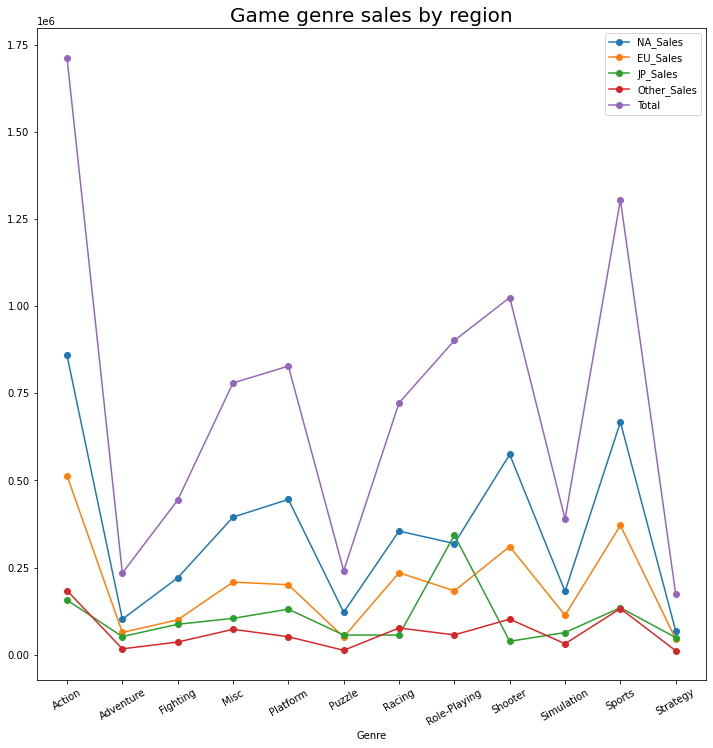

In [17]:
# 이를 그래프로 보면 다음과 같다.
import seaborn as sns
import matplotlib.pyplot as plt

df_GS.plot(figsize=(12,12), marker='o')
ax = plt.subplot()
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax.set_xticklabels(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing',
                    'Role-Playing', 'Shooter', 'Simulation', 'Sports', 'Strategy'], rotation=30)

plt.title("Game genre sales by region", fontsize=20)

- 위의 그래프에서 일본을 제외한 국가들이 비슷한 모습을 나타낸다.
- 총 출고량과 북미, 유럽, 기타 국가는 '액션'과 '스포츠' 장르가 순서대로 높았다.
- 하지만 일본에서는 '롤플레잉'이 가장 높았다.

### ♦ 실제 지역별 장르 출고량 상위 3가지

In [18]:
# 멜트 데이터프레임 준비
df_GS = df_GS.reset_index()
melted_GS = pd.melt(df_GS, id_vars=['Genre'], value_vars=df_GS.columns[1:],
                      var_name='Nation', value_name='Sales')
melted_GS.head()

Genre    Nation     Sales
0     Action  NA_Sales  858750.0
1  Adventure  NA_Sales  101790.0
2   Fighting  NA_Sales  220350.0
3       Misc  NA_Sales  394730.0
4   Platform  NA_Sales  445380.0

In [37]:
# 지역별 출고량 상위 3가지 함수
def Third(df, sales_col):
    new_df = df.loc[:, ['Genre', sales_col]].sort_values(by=sales_col, ascending=False).reset_index(drop=True).head(3)
    new_df.columns = ['Genre', 'Sales']
    return new_df

In [20]:
# 상위 3가지 데이터 저장
na_genre_third = Third(df_GS, 'NA_Sales')
eu_genre_third = Third(df_GS, 'EU_Sales')
jp_genre_third = Third(df_GS, 'JP_Sales')
other_genre_third = Third(df_GS, 'Other_Sales')

Third_list = [na_genre_third, eu_genre_third, jp_genre_third, other_genre_third]
columnss = df_GS.columns[1:]

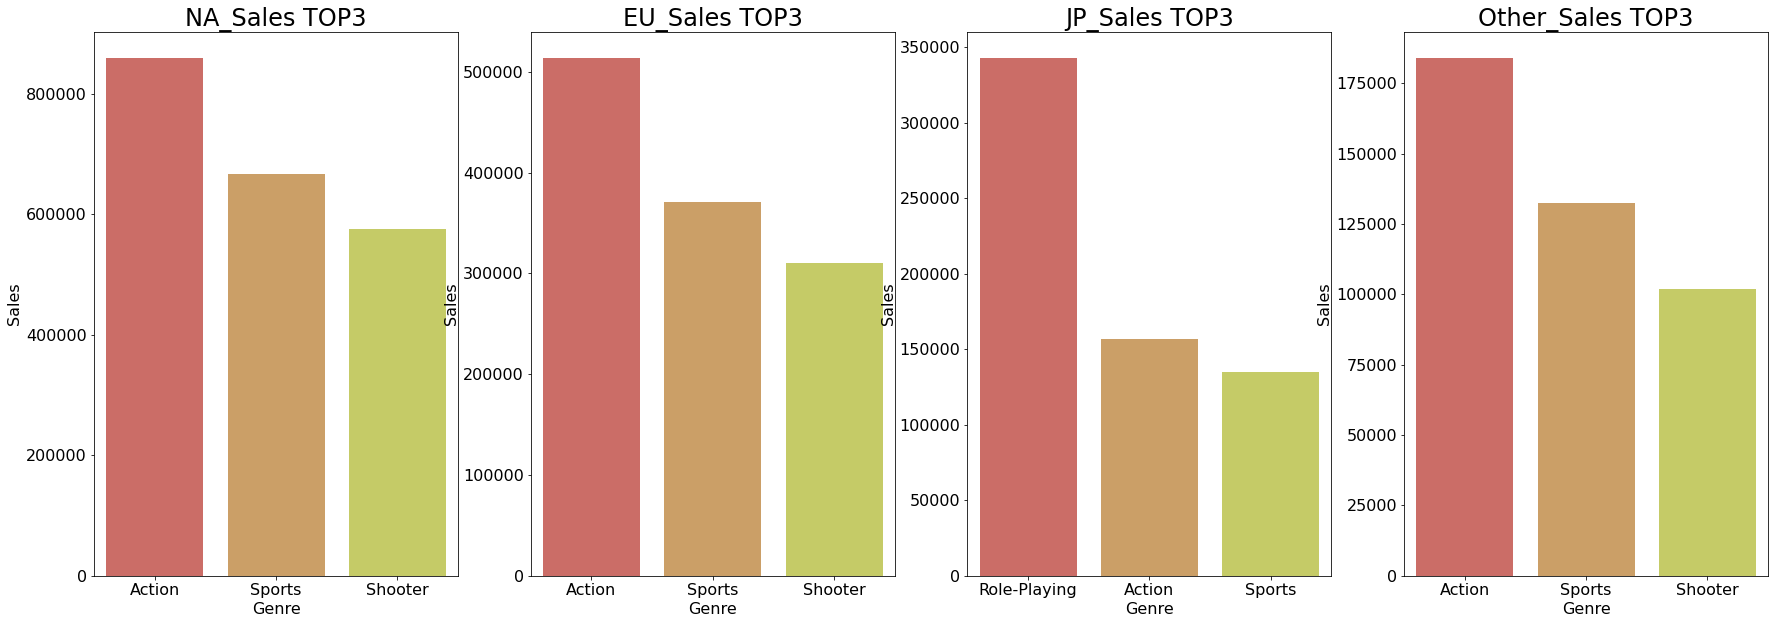

In [38]:
# 그래프로 시각화
fig, axs = plt.subplots(figsize=(30, 10), nrows=1, ncols=4)
for col, i, data in zip(columnss, range(len(columnss)), Third_list):
    axs[i].set_title(col + ' ' + 'TOP3', fontsize=24)
    sns.barplot(x='Genre', y='Sales', data=data, ax=axs[i])
    axs[i].tick_params(axis='both',labelsize=16)
    axs[i].set_xlabel('Genre', fontsize=16)
    axs[i].set_ylabel('Sales', fontsize=16)
plt.show()

- 예상했던 바와 같이 일본의 출고량 순위만 다른 것을 확인할 수 있다.

# 🎈 연도별 게임의 트랜드가 있을까?

### ♦ 연도별 총 출고량
- 전체적인 모습을 알기 위해 먼저 연도별 총 출고량을 살펴본다.

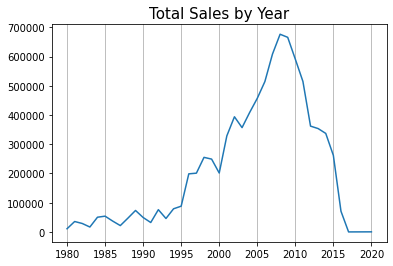

In [22]:
# 연도별 총 출고량 시각화
plt.plot(raw.groupby('Year')['Total'].sum())
plt.title(str("Total Sales by Year"),fontsize=15)
plt.grid(axis='x')
plt.show()

- 전체적인 출고량으로 보았을 때, 1995년을 기점으로 폭발적인 수요가 있었던 것을 알 수 있다.
- 하지만 2008년쯤을 기준으로 매우 급격하게 감소하는 모습을 보인다.

### ♦ 연도에 따른 장르별 출고량
- 그렇다면 연도에 따른 장르별 출고량은 어떻게 다른지 살펴보자.

In [23]:
df_GY = raw.groupby(['Year', 'Genre'])['Total'].sum().unstack()
df_GY = df_GY.fillna(0)
df_GY = df_GY.reset_index()

In [24]:
df_GY.head()

Genre    Year   Action  Adventure  Fighting    Misc  Platform   Puzzle  \
0      1980.0    340.0        0.0     770.0  2700.0       0.0      0.0   
1      1981.0  14790.0        0.0       0.0     0.0    6920.0   2250.0   
2      1982.0   6500.0        0.0       0.0   870.0    5030.0  10040.0   
3      1983.0   2860.0      400.0       0.0  2140.0    6930.0    780.0   
4      1984.0   1850.0        0.0       0.0  1450.0     690.0   3140.0   

Genre  Racing  Role-Playing  Shooter  Simulation  Sports  Strategy  
0         0.0           0.0   7070.0         0.0     0.0       0.0  
1       480.0           0.0  10020.0       440.0   780.0       0.0  
2      1570.0           0.0   3810.0         0.0  1060.0       0.0  
3         0.0           0.0    490.0         0.0  3200.0       0.0  
4      5950.0           0.0  31100.0         0.0  6170.0       0.0

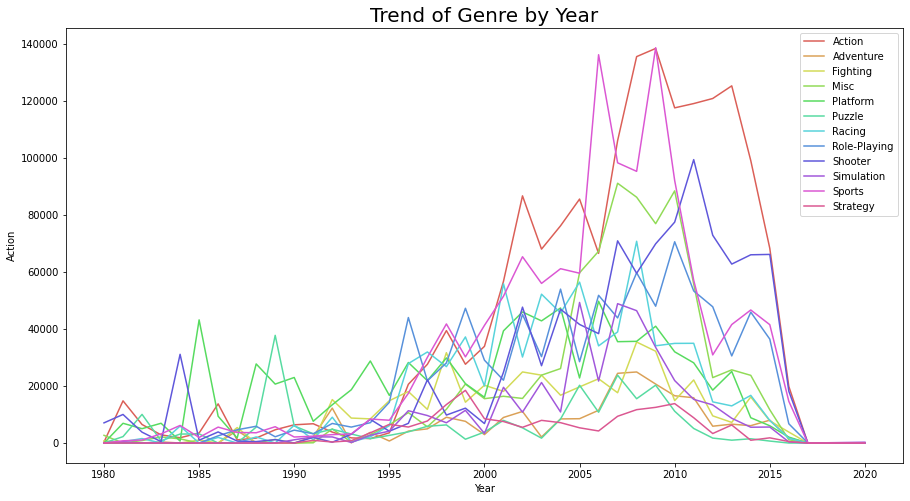

In [25]:
sns.set_palette('hls',12)
color = ['']
plt.figure(figsize=(15, 8))
plt.title('Trend of Genre by Year', fontsize=20)
genre = df_GY.columns
for i in range(1, len(genre)):
    sns.lineplot(data=df_GY, x='Year', y=genre[i], label=genre[i])

- 여러 장르를 그래프로 나타내려다보니 쉽게 파악할 수 없다.
- 다만, '액션'과 '스포츠' 장르가 2000년대 초반부터 크게 성행하며 총 출고량을 높이는 것을 볼 수 있다.

### ♦ 카이제곱 검정을 통한 비교분석


- 그래프로 시각화하는 방법으로는 '연도'와 '장르'사이에 연관성이 있는지 파악하기 힘드므로, 카이제곱 검정을 통하여 분석해본다.

In [48]:
# 크로스탭 만들기
df_GY_CT = pd.crosstab(raw.Genre,raw.Year)
df_GY_CT
af = df_GY_CT.iloc[:,29:37]
af
qf = df_GY_CT.iloc[:,29:32]
qf

Year          2009.0  2010.0  2011.0
Genre                               
Action           271     226     239
Adventure        141     153     107
Fighting          53      40      49
Misc             207     200     183
Platform          28      31      37
Puzzle            79      45      43
Racing            83      57      64
Role-Playing     103     103      95
Shooter           91      81      94
Simulation       123      79      55
Sports           184     185     122
Strategy          65      53      45

In [49]:
# 카이제곱 검정
from scipy import stats

chi1, p1, dof1, expected1 = stats.chi2_contingency(observed = df_GY_CT, correction = True)
print(p1)
chi2, p2, dof2, expected2 = stats.chi2_contingency(observed = af, correction = True)
print(p2)
chi3, p3, dof3, expected3 = stats.chi2_contingency(observed = qf, correction = True)
print(p3)

0.0
9.742054549701299e-89
0.00028489292844955126


- P-value는 0.0으로 귀무가설인 "'연도'와 '장르'간의 상관관계가 있다'를 분명하게 기각하고 대립가설인 '상관관계가 없음'을 채택한다.
- 시장이 성행했던 2009년에서 2016년의 데이터만 따로 살펴보아도 귀무가설을 기각하고 대립가설을 채택한다.
- 이는 게임 장르의 트렌드가 시간의 흐름에 따라 일정하지 않다는 것을 뜻하며, 트랜드가 바뀌었다는 것을 알 수 있다.

### ♦ 연도별 상위 10가지 플랫폼별 출고량 그래프


- 장르가 아닌 다른 원인이 있는 것은 아닌지 플랫폼별 출고량 그래프 또한 살펴본다.

In [31]:
# 연도에 따른 각 플랫폼 별 판매량
df_YP = raw.groupby(['Year', 'Platform'])['Total'].sum()
df_YP = df_YP.reset_index()
df_YP.head()

Year Platform    Total
0  1980.0     2600  10880.0
1  1981.0     2600  35680.0
2  1982.0     2600  28880.0
3  1983.0     2600   5840.0
4  1983.0      NES  10960.0

In [32]:
# 판매량이 가장 높은 10개의 플랫폼 리스트 만들기.

df_platform = df_YP.groupby('Platform')['Total'].sum().to_frame()
df_platform = df_platform.sort_values(by='Total', ascending=False).head(10)
df_platform = df_platform.reset_index()
platform_list = df_platform['Platform'].array

# 판매량이 가장 높은 10개의 플랫폼의 정보를 df_platform_top10에 담기.
df_platform_top10 = pd.DataFrame()

for i in range(len(platform_list)):
    df_p = df_YP[df_YP['Platform']==platform_list[i]]
    df_platform_top10 = df_platform_top10.append(df_p)
    
df_platform_top10.head()

Year Platform     Total
94   2000.0      PS2   39170.0
104  2001.0      PS2  163730.0
113  2002.0      PS2  205380.0
119  2003.0      PS2  184310.0
125  2004.0      PS2  210470.0

Text(0.5, 1.0, 'Platform Sales by Year')

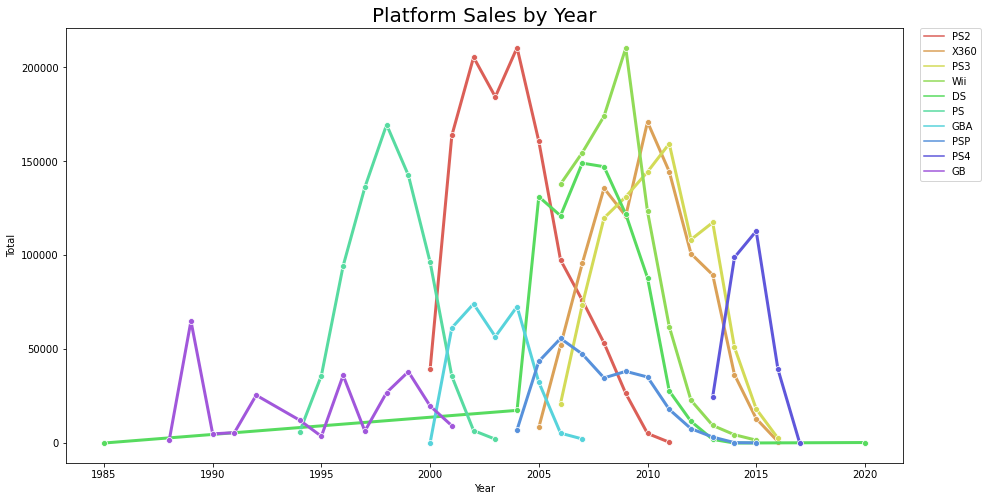

In [33]:
# 연도에 따른 탑10 플랫폼별 판매량 그래프 그리기
plt.figure(figsize=(15, 8))

sns.lineplot(data=df_platform_top10, x="Year", y="Total", hue="Platform", marker='o', linewidth=3)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.title('Platform Sales by Year', fontsize=20)

- 위의 그래프에서는 'PS2', 'Wii', 'DS'등의 플랫폼이 2000년대에 붐을 일으켰으나 2010년 이후 빠르게 사장되는 것을 볼 수 있다.
- 특히, 시장을 선도했던 'PS-'플랫폼 시리즈와 'Wii','DS' 시리즈는 각각 'Sony', '닌텐도'에 속한 플랫폼이다.

# 🎈 출고량이 높은 게임

### ♦ 게임 출고량 상위 100가지의 출판회사 분포

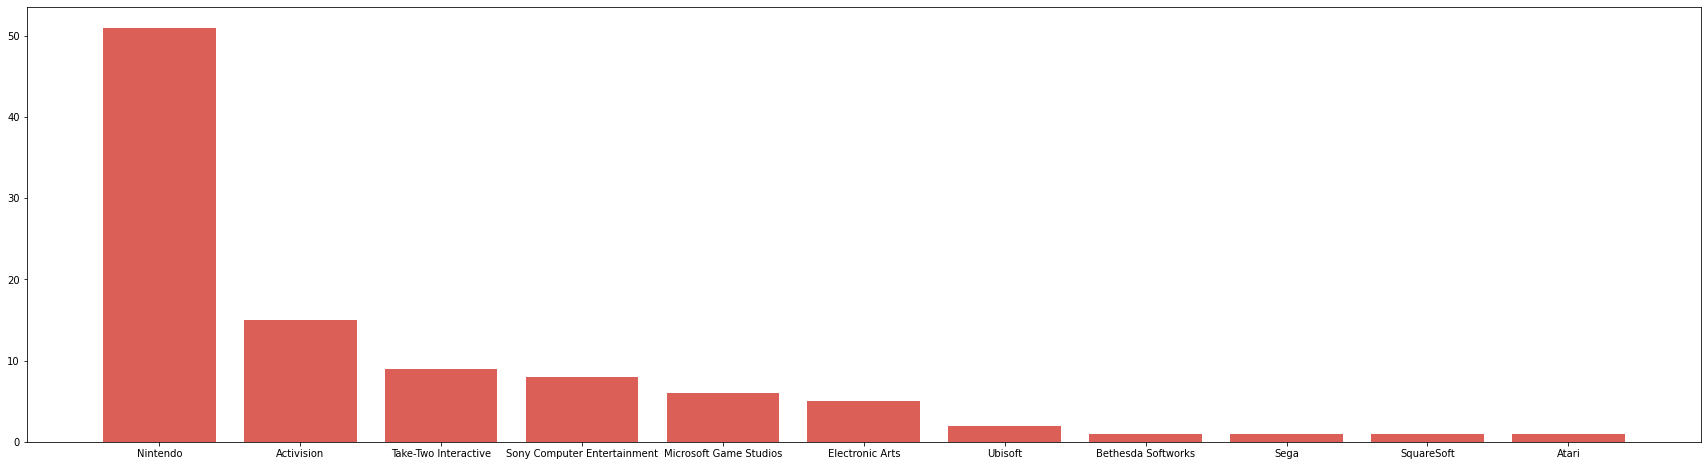

In [34]:
top100 = raw.nlargest(100,columns='Total')

plt.figure(figsize=(30,8))
plt.bar(top100['Publisher'].value_counts().index,top100['Publisher'].value_counts())
plt.show()

- 출고량이 많은 게임은 닌텐도 사에서 많이 발매되었음을 알 수 있다.

### ♦ 출고량 상위 10가지 게임

In [35]:
# 판매량이 높은 Top10
sales_top10 = raw.loc[raw.Total.sort_values(ascending=False).index].reset_index(drop=True).head(10)
rank = [str(x)+' 위' for x in range(1, 11)]
sales_top10['rank'] = rank
sales_top10

Unnamed: 0                       Name Platform    Year         Genre  \
0        2909                 Wii Sports      Wii  2006.0        Sports   
1        4200          Super Mario Bros.      NES  1985.0      Platform   
2       12580             Mario Kart Wii      Wii  2008.0        Racing   
3        3353          Wii Sports Resort      Wii  2009.0        Sports   
4        7830   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
5        1204                     Tetris       GB  1989.0        Puzzle   
6        6938      New Super Mario Bros.       DS  2006.0      Platform   
7        3015                   Wii Play      Wii  2006.0          Misc   
8       16532  New Super Mario Bros. Wii      Wii  2009.0      Platform   
9       10489                  Duck Hunt      NES  1984.0       Shooter   

  Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales    Total  rank  
0  Nintendo   41490.0   29020.0    3770.0       8460.0  82740.0   1 위  
1  Nintendo   29080.0    3580.0    6810.0        770.0  40240.0   2 위  
2  Nintendo   15850.0   12880.0    3790.0       3310.0  35830.0   3 위  
3  Nintendo   15750.0   11010.0    3280.0       2960.0  33000.0   4 위  
4  Nintendo   11270.0    8890.0   10220.0       1000.0  31380.0   5 위  
5  Nintendo   23200.0    2260.0    4220.0        580.0  30260.0   6 위  
6  Nintendo   11380.0    9230.0    6500.0       2900.0  30010.0   7 위  
7  Nintendo   14030.0    9200.0    2930.0       2850.0  29010.0   8 위  
8  Nintendo   14590.0    7060.0    4700.0       2260.0  28610.0   9 위  
9  Nintendo   26930.0     630.0     280.0        470.0  28310.0  10 위

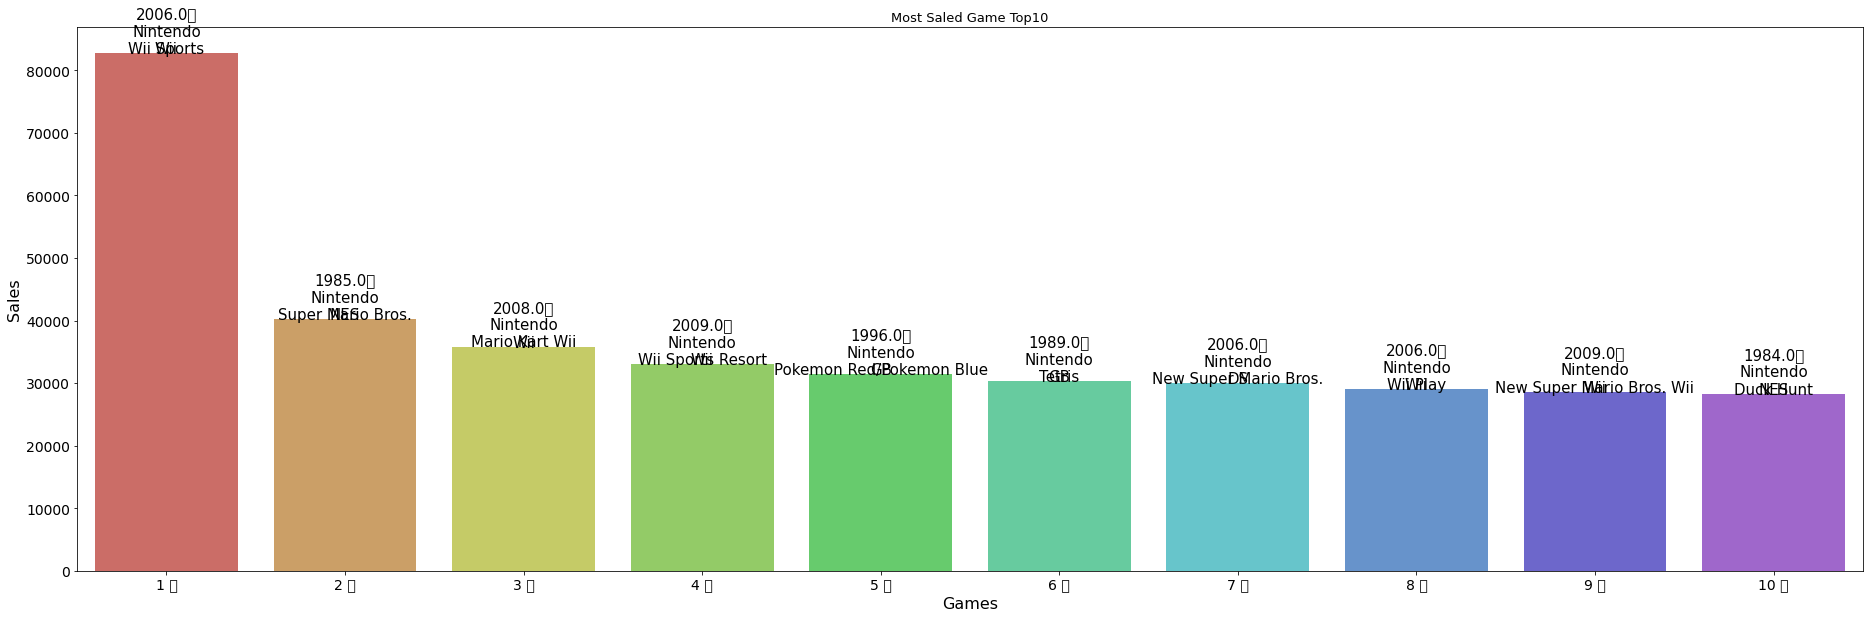

In [36]:
#시각화

plt.figure(figsize=(32,10))
a = sns.barplot(x='rank', y='Total', data=sales_top10)
i = 0
for name, year, val, platform, publisher in zip(sales_top10.Name, sales_top10.Year, sales_top10.Total, 
                                                sales_top10.Platform, sales_top10.Publisher):
    a.text(x=i, y=val+2, s=(name), color='black', ha='center', fontsize=15)
    a.text(x=i, y=val-8, s=(str(year) + '년' + '\n' + publisher + '\n' + platform), color='black', ha='center', fontsize=15)
    i+=1
a.set_title('Most Saled Game Top10' , fontsize=13)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Games', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

- 100가지 중 출고량이 가장 많은 10가지는 모두 닌텐도 사에서 발매 되었다.

- 따라서 위 시장 분석은 콘솔 게임 플랫폼에 관한 정보를 담고 있으며, 모바일, 온라인, VR게임의 성행으로 콘솔 게임의 사장을 보여주고 있다.